# <center style='color:deeppink'> `OpenSlide` for Whole-Slide Image (WSI) Processing </center>

# Import required libraries

In [1]:
import openslide
from openslide import open_slide
from openslide.deepzoom import DeepZoomGenerator

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = Image.open('WSI.svs')

In [3]:
im.size

(78522, 20094)

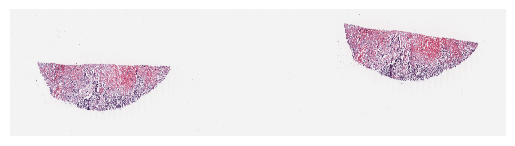

In [4]:
plt.imshow(im)
plt.axis('off');

In [5]:
slide = open_slide('WSI.svs') # to open a WSI

In [6]:
slide.detect_format('WSI.svs') # returns the vendor name

'aperio'

In [7]:
slide.level_count # number of levels in the WSI

4

In [8]:
slide.dimensions # (W, H) in level 0 (highest resolution)

(78522, 20094)

In [9]:
slide.level_dimensions # (W, H) in all levels

((78522, 20094), (19630, 5023), (4907, 1255), (2453, 627))

In [10]:
slide.level_downsamples # shows downsample factors for each level of the slide 

(1.0, 4.00025002664767, 16.00659664175984, 32.0292230780784)

In [11]:
slide_props = slide.properties # metadata in the WSI
slide_props

<_PropertyMap {'aperio.AppMag': '40', 'aperio.DSR ID': 'resc3-dsr2', 'aperio.Date': '07/06/10', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': 'TCGA-B6-A0RH-01A-02-BSB', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '26889', 'aperio.Left': '21.349222', 'aperio.LineAreaXOffset': '-0.014041', 'aperio.LineAreaYOffset': '0.000544', 'aperio.LineCameraSkew': '0.000833', 'aperio.MPP': '0.2485', 'aperio.OriginalHeight': '20194', 'aperio.OriginalWidth': '82000', 'aperio.Parmset': 'CHTN FocusRad18 on RESBPCLACIE01', 'aperio.ScanScope ID': 'SS1436CNTLR', 'aperio.StripeWidth': '1000', 'aperio.Time': '10:37:08', 'aperio.Title': 'TCGA-B6-A0RH-01A-02-BSB', 'aperio.Top': '13.992834', 'aperio.User': '5f0b7608-567f-479c-9a88-0920e58b60d5', 'openslide.comment': 'Aperio Image Library v10.2.20\r\n82000x20194 [0,100 78522x20094] (256x256) JPEG/RGB Q=30|AppMag = 40|StripeWidth = 1000|ScanScope ID

In [12]:
slide_props['aperio.AppMag'] # optical magnification

'40'

In [13]:
slide_props['openslide.vendor'] # shows vendor name

'aperio'

# Standard properties (START)

In [14]:
slide_props[openslide.PROPERTY_NAME_VENDOR] # identification of the vendor

'aperio'

In [15]:
slide_props[openslide.PROPERTY_NAME_COMMENT]

'Aperio Image Library v10.2.20\r\n82000x20194 [0,100 78522x20094] (256x256) JPEG/RGB Q=30|AppMag = 40|StripeWidth = 1000|ScanScope ID = SS1436CNTLR|Filename = TCGA-B6-A0RH-01A-02-BSB|Title = TCGA-B6-A0RH-01A-02-BSB|Date = 07/06/10|Time = 10:37:08|User = 5f0b7608-567f-479c-9a88-0920e58b60d5|Parmset = CHTN FocusRad18 on RESBPCLACIE01|MPP = 0.2485|Left = 21.349222|Top = 13.992834|LineCameraSkew = 0.000833|LineAreaXOffset = -0.014041|LineAreaYOffset = 0.000544|Focus Offset = -0.000500|DSR ID = resc3-dsr2|ImageID = 26889|Exposure Time = 109|Exposure Scale = 0.000001|DisplayColor = 0|OriginalWidth = 82000|OriginalHeight = 20194|ICC Profile = ScanScope v1'

In [16]:
slide_props[openslide.PROPERTY_NAME_OBJECTIVE_POWER] # magnification of optical lens

'40'

In [17]:
slide_props[openslide.PROPERTY_NAME_MPP_X] # number of microns per pixels in the X dimension of level 0

'0.2485'

In [18]:
slide_props[openslide.PROPERTY_NAME_MPP_Y] # number of microns per pixels in the Y dimension of level 0

'0.2485'

# Standard properties (END)

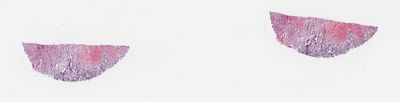

In [19]:
# get a thumbnail of our WSI (resized image)

slide_thumb = slide.get_thumbnail(size=(400, 400))
slide_thumb

In [20]:
slide_thumb.size

(400, 102)

In [21]:
dims = slide.level_dimensions

In [22]:
dims

((78522, 20094), (19630, 5023), (4907, 1255), (2453, 627))

In [23]:
# select a level

level3_dim = dims[2]

In [24]:
level3_img = slide.read_region((0, 0), 2, (1500, 1000)) # (location, level, size)

In [25]:
level3_img.size

(1500, 1000)

`read_region` object returns an `RGBA` image

In [26]:
level3_img.mode

'RGBA'

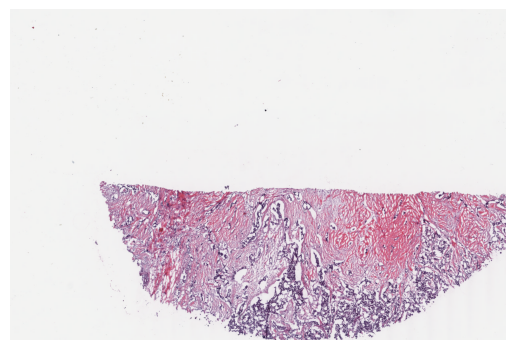

In [27]:
plt.imshow(level3_img)
plt.axis('off');

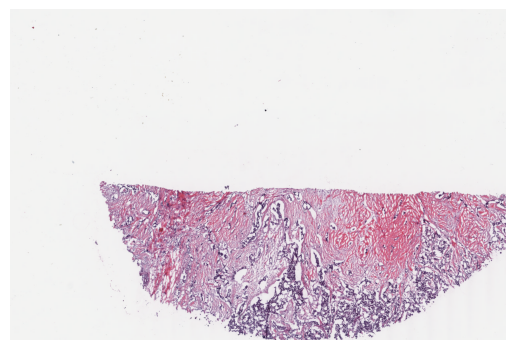

In [28]:
# convert RGBA image to RGB

level3_img_RGB = level3_img.convert('RGB')
plt.imshow(level3_img_RGB)
plt.axis('off');

In [29]:
level3_img_RGB.mode

'RGB'

In [30]:
# return the best level for displaying the given downsample

downsample = 20
best_level = slide.get_best_level_for_downsample(downsample)
best_level

2

# Tiling from slide

In [31]:
tiles = DeepZoomGenerator(slide, tile_size=224, overlap=0) # create tiles object

In [32]:
print('Number of Deep Zoom levels:', tiles.level_count, '\n')
print(tiles.level_dimensions) # returns a list of tuples for each Deep Zoom level

Number of Deep Zoom levels: 18 

((1, 1), (2, 1), (3, 1), (5, 2), (10, 3), (20, 5), (39, 10), (77, 20), (154, 40), (307, 79), (614, 157), (1227, 314), (2454, 628), (4908, 1256), (9816, 2512), (19631, 5024), (39261, 10047), (78522, 20094))


In [33]:
print('Number of Deep Zoom tiles:', tiles.tile_count)

Number of Deep Zoom tiles: 42253


In [34]:
level_num = 10
print('Tile counts at Deep Zoom level', level_num, 'is:', tiles.level_tiles[level_num])

Tile counts at Deep Zoom level 10 is: (3, 1)


In [35]:
tiles.level_tiles

((1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (6, 2),
 (11, 3),
 (22, 6),
 (44, 12),
 (88, 23),
 (176, 45),
 (351, 90))

In [36]:
print('So, there are', tiles.level_tiles[level_num][0] * tiles.level_tiles[level_num][1], 'tiles in level', level_num)

So, there are 3 tiles in level 10


In [37]:
tiles.get_tile_coordinates(10, (0, 0)) # (0, 0) ---> (col, row)

((0, 0), 3, (896, 627))

returns (`pixels_x, pixels_y`) for the specified tile

In [38]:
tile_dims = tiles.get_tile_dimensions(10, (0, 0))

In [39]:
tile_dims

(224, 157)

In [40]:
tile_count_in_large_image = tiles.level_tiles[17]
tile_count_in_large_image

(351, 90)

In [41]:
print('So, there are', tile_count_in_large_image[0] * tile_count_in_large_image[1], 'tiles in level 17')

So, there are 31590 tiles in level 17


In [42]:
tile_dims1 = tiles.get_tile_dimensions(17, (70, 50))

In [43]:
tile_dims1

(224, 224)

In [44]:
tile_dims2 = tiles.get_tile_dimensions(17, (350, 89))

In [45]:
tile_dims2

(122, 158)

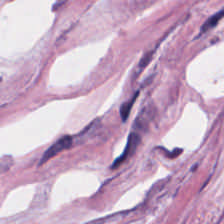

In [46]:
single_tile = tiles.get_tile(17, (56, 58))
single_tile

In [47]:
single_tile.size

(224, 224)

In [48]:
columns, rows = tiles.level_tiles[11]
columns, rows

(6, 2)

In [49]:
gather = []

In [50]:
for C in range(columns):
    for R in range(rows):
        create_tile = tiles.get_tile(11, (C, R))
        create_tile_arr = np.array(create_tile)
        gather.append(create_tile_arr)

In [51]:
len(gather)

12

(224, 224, 3) Image: 1


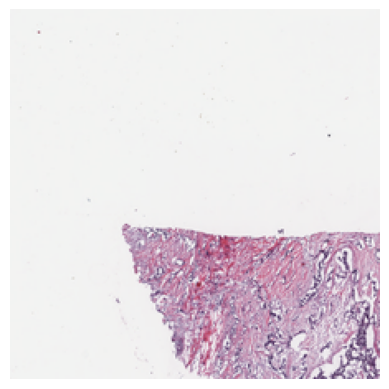

(90, 224, 3) Image: 2


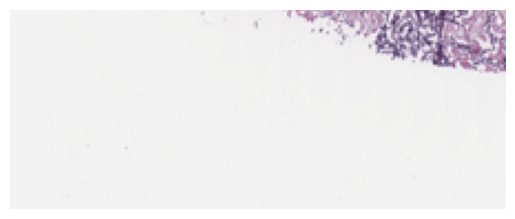

(224, 224, 3) Image: 3


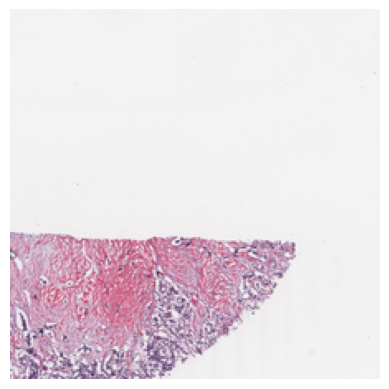

(90, 224, 3) Image: 4


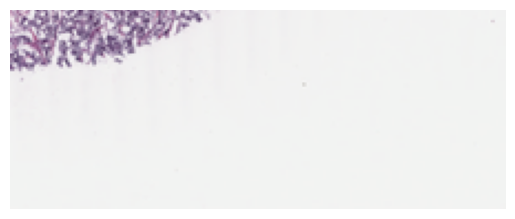

(224, 224, 3) Image: 5


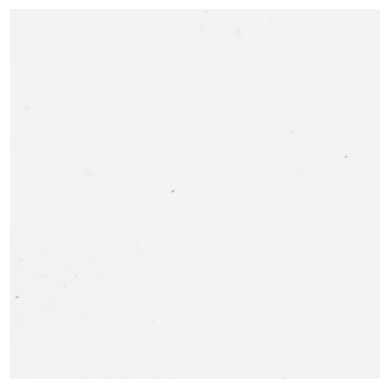

(90, 224, 3) Image: 6


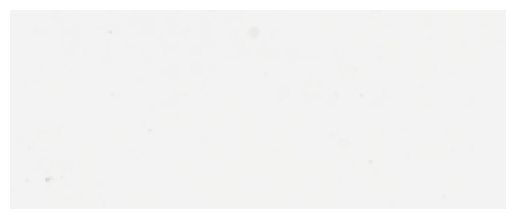

(224, 224, 3) Image: 7


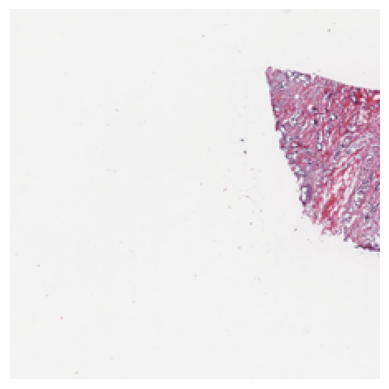

(90, 224, 3) Image: 8


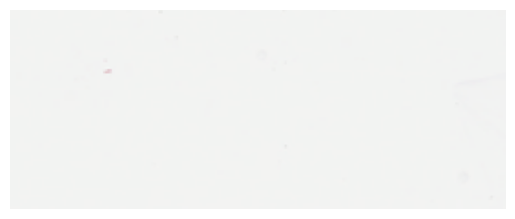

(224, 224, 3) Image: 9


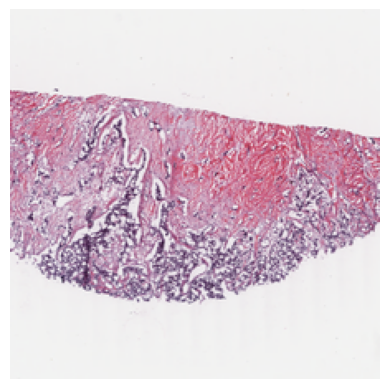

(90, 224, 3) Image: 10


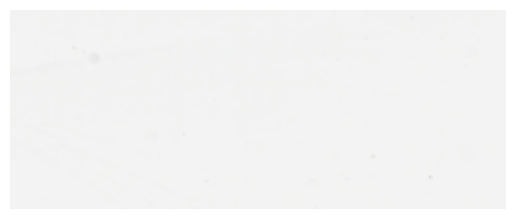

(224, 107, 3) Image: 11


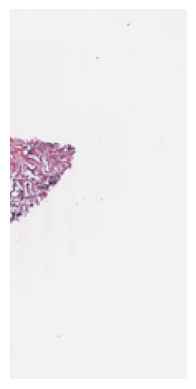

(90, 107, 3) Image: 12


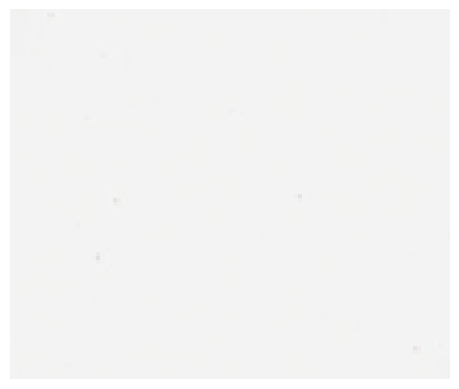

In [52]:
for i in range(len(gather)):
    print(gather[i].shape, 'Image:', i+1)
    plt.imshow(gather[i])
    plt.axis(False)
    plt.show()